# Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


# Data Description :


* Undergrad : person is under graduated or not

* Marital.Status : marital status of a person

* Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 

* Work Experience : Work experience of an individual person

* Urban : Whether that person belongs to urban area or not



In [2]:
fc=pd.read_csv("F:/ExcelR workings/Assignments/Decision Trees/Fraud_check.CSV")

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [3]:
fc.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [4]:
fc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
FC=fc.copy()

In [6]:
## Converting the Taxable income variable
fc["income"]="<=30000"
fc.loc[fc["Taxable.Income"]>30000,"income"]="Good"
fc.loc[fc["Taxable.Income"]<=30000,"income"]="Risky"

In [7]:
fc

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


<AxesSubplot:>

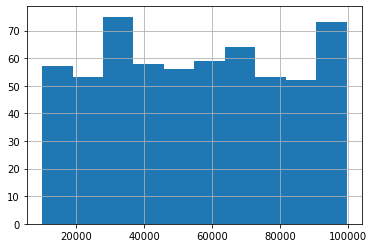

In [8]:
fc['Taxable.Income'].hist()

<AxesSubplot:>

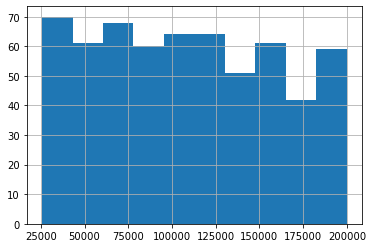

In [9]:
fc['City.Population'].hist()

<AxesSubplot:>

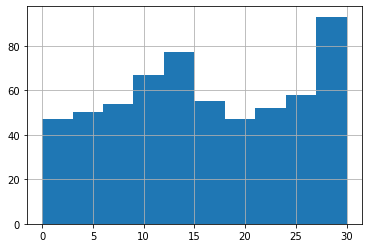

In [10]:
fc['Work.Experience'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x4094e28af0>,
 'caps': [<matplotlib.lines.Line2D at 0x4094e361f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x4094e28790>],
 'medians': [<matplotlib.lines.Line2D at 0x4094e368b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x4094e36c10>],
 'means': []}

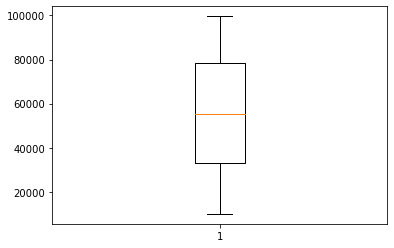

In [11]:
plt.boxplot(fc['Taxable.Income'])

{'whiskers': [<matplotlib.lines.Line2D at 0x4094e85be0>,
 'caps': [<matplotlib.lines.Line2D at 0x4094e93310>,
 'boxes': [<matplotlib.lines.Line2D at 0x4094e85880>],
 'medians': [<matplotlib.lines.Line2D at 0x4094e939d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x4094e93d30>],
 'means': []}

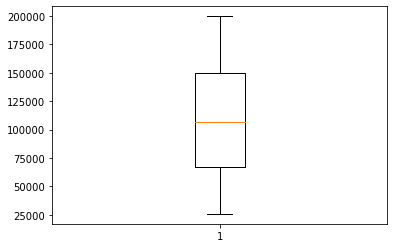

In [12]:
plt.boxplot(fc['City.Population'])

{'whiskers': [<matplotlib.lines.Line2D at 0x4094df3730>,
 'caps': [<matplotlib.lines.Line2D at 0x4094e02100>,
 'boxes': [<matplotlib.lines.Line2D at 0x4094d55130>],
 'medians': [<matplotlib.lines.Line2D at 0x4094e02d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x4094e28940>],
 'means': []}

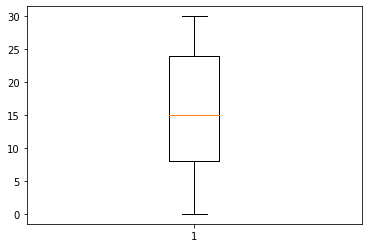

In [13]:
plt.boxplot(fc['Work.Experience'])

<AxesSubplot:xlabel='Undergrad', ylabel='count'>

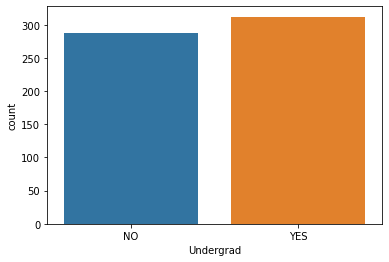

In [14]:
sns.countplot(x="Undergrad", data=fc)

<AxesSubplot:xlabel='Marital.Status', ylabel='count'>

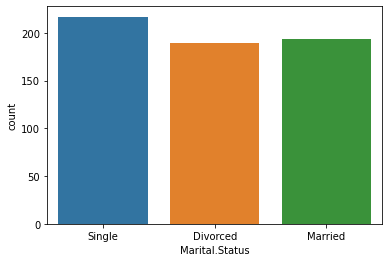

In [15]:
sns.countplot(x="Marital.Status", data=fc)

<AxesSubplot:xlabel='Urban', ylabel='count'>

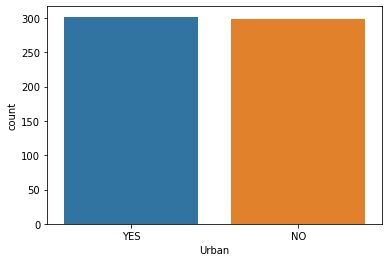

In [16]:
sns.countplot(x="Urban", data=fc)

<AxesSubplot:xlabel='income', ylabel='count'>

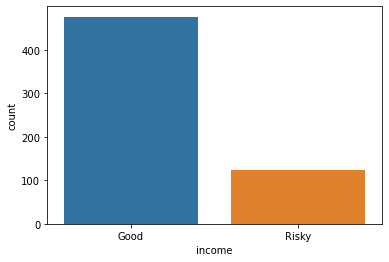

In [17]:
sns.countplot(x="income", data=fc)

In [18]:
## Droping the Taxable income variable
fc.drop(['Taxable.Income'], axis=1, inplace=True)

In [19]:
fc.drop(['City.Population'], axis=1, inplace=True)

In [20]:
fc

,Undergrad,Marital.Status,Work.Experience,Urban,income
0,NO,Single,10,YES,Good
1,YES,Divorced,18,YES,Good
2,NO,Married,30,YES,Good
3,YES,Single,15,YES,Good
4,NO,Married,28,NO,Good
...,...,...,...,...,...
595,YES,Divorced,7,YES,Good
596,YES,Divorced,2,YES,Good
597,NO,Divorced,0,YES,Good
598,YES,Married,17,NO,Good


In [21]:
fc.rename(columns={"Undergrad":"UG",
                      "Marital.Status":"MS",
                      "Work.Experience":"Exp"}, inplace=True)

In [22]:
fc

,UG,MS,Exp,Urban,income
0,NO,Single,10,YES,Good
1,YES,Divorced,18,YES,Good
2,NO,Married,30,YES,Good
3,YES,Single,15,YES,Good
4,NO,Married,28,NO,Good
...,...,...,...,...,...
595,YES,Divorced,7,YES,Good
596,YES,Divorced,2,YES,Good
597,NO,Divorced,0,YES,Good
598,YES,Married,17,NO,Good


In [23]:
label_encoder=preprocessing.LabelEncoder()
for column_name in fc.columns:
    if fc[column_name].dtype == object:
        fc[column_name] = label_encoder.fit_transform(fc[column_name])
    else:
        pass

In [24]:
fc

,UG,MS,Exp,Urban,income
0,0,2,10,1,0
1,1,0,18,1,0
2,0,1,30,1,0
3,1,2,15,1,0
4,0,1,28,0,0
...,...,...,...,...,...
595,1,0,7,1,0
596,1,0,2,1,0
597,0,0,0,1,0
598,1,1,17,0,0


In [25]:
fc['UG'].unique()

array([0, 1])

In [26]:
fc['MS'].unique()

array([2, 0, 1])

In [27]:
fc['Urban'].unique()

array([1, 0])

In [28]:
fc['income'].unique()

array([0, 1])

In [29]:
##Splitting the data into featuers and labels
x=fc.iloc[:,:4]
y=fc.iloc[:,4]

In [30]:
x

,UG,MS,Exp,Urban
0,0,2,10,1
1,1,0,18,1
2,0,1,30,1
3,1,2,15,1
4,0,1,28,0
...,...,...,...,...
595,1,0,7,1
596,1,0,2,1
597,0,0,0,1
598,1,1,17,0


In [31]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: income, Length: 600, dtype: int32

In [32]:
fc['income'].unique()

array([0, 1])

In [33]:
fc['income'].value_counts()

0    476
1    124
Name: income, dtype: int64

In [34]:
## Collecting the column names
colnames = list(fc.columns)

In [35]:
colnames

['UG', 'MS', 'Exp', 'Urban', 'income']

#### Splitting the data into train and test

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=44)

In [37]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((480, 4), (120, 4), (480,), (120,))

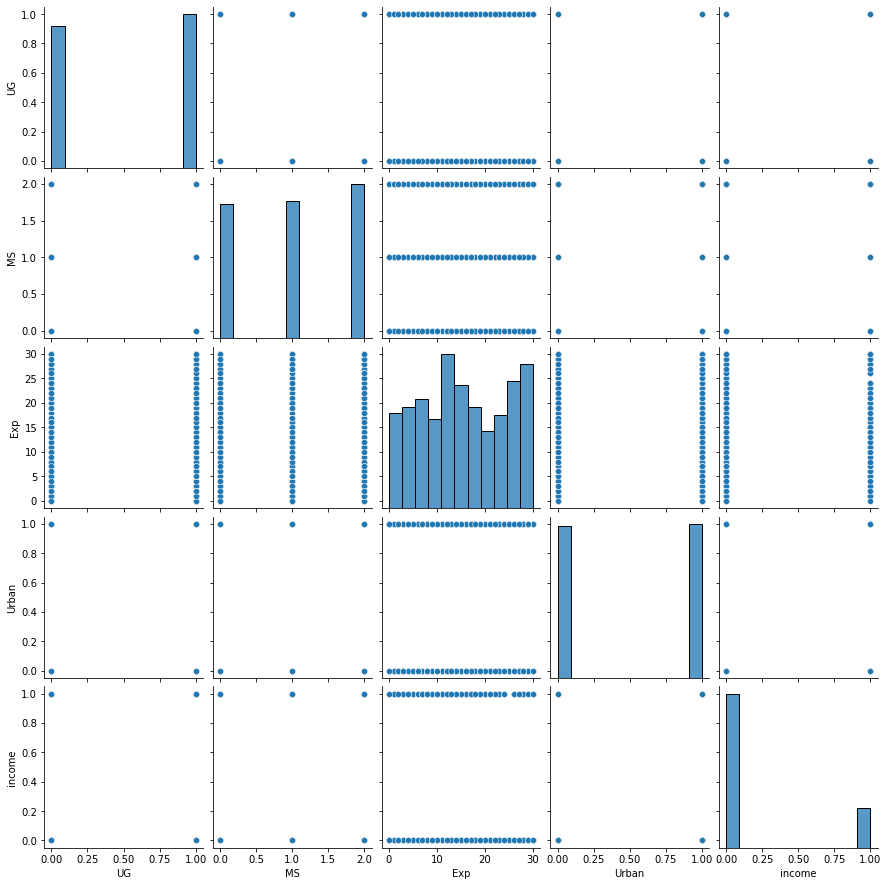

In [38]:
import seaborn as sns
sns.pairplot(fc)

In [67]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Building Decision Tree classifier using Entropy Criteria

In [54]:
model=DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

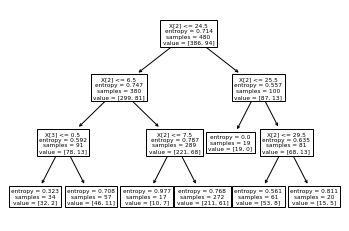

In [55]:
tree.plot_tree(model);

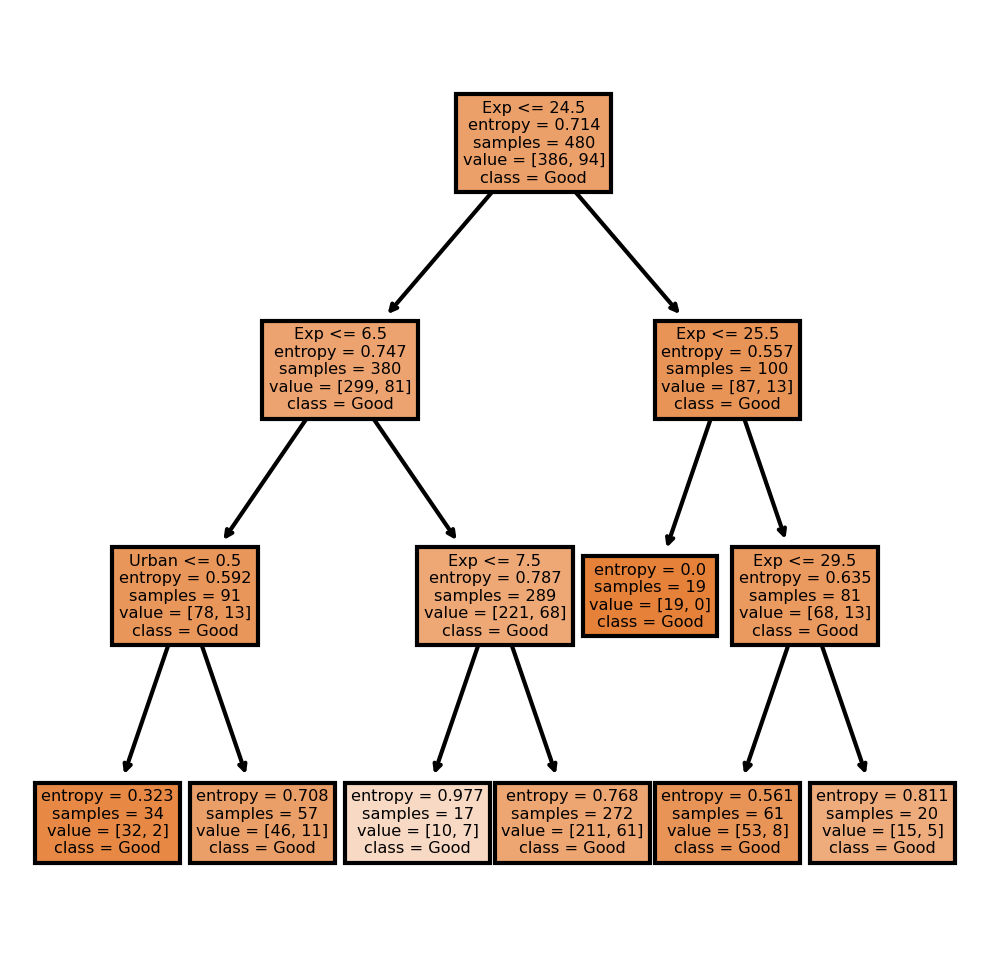

In [56]:
fn=['UG', 'MS', 'Exp', 'Urban']
cn=['Good', 'Risky']
fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=300)
tree.plot_tree(model,
               feature_names=fn, 
               class_names=cn,
               filled= True);

In [79]:
# Prediction on Training data
pred_train= model.predict(x_train)
pd.Series(pred_train).value_counts() 

0    480
dtype: int64

In [80]:
# Finding Accuracy for train data
acc_train = accuracy_score(y_train,pred_train)
acc_train

0.8041666666666667

In [81]:
## Confusion matrix
confusion_mat = pd.DataFrame(confusion_matrix(y_train,pred_train,))
confusion_mat

,0,1
0,386,0
1,94,0


In [57]:
# Predicting the test data
preds= model.predict(x_test)
pd.Series(preds).value_counts() # getting the count of each category

0    120
dtype: int64

In [58]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [59]:
pd.crosstab(y_test, preds) # Getting the 2 way table to understand the correct and wrong predictions

col_0,0
income,
0,90
1,30


In [64]:
# Accuracy
np.mean(preds==y_test)

0.75

In [68]:
# Accuracy check on test data
acc_test = accuracy_score(y_test,preds)
acc_test

0.75

In [69]:
# Confusion Matrix
confusion_test=pd.DataFrame(confusion_matrix(y_test,preds))
confusion_test

,0,1
0,90,0
1,30,0


### Building Decision Tree classifier (CART) using Gini Criteria

In [61]:
model_gini=DecisionTreeClassifier(criterion= 'gini', max_depth=3)

In [62]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [78]:
# Prediction and computing the accuracy
pred=model_gini.predict(x_test)
np.mean(pred==y_test)

0.75

In [76]:
model_gini.score(x_test,y_test)

0.75

In [77]:
model_gini.score(x_train,y_train)

0.8041666666666667